# Optimizing trees: balancing the variance

With a C++-version of the lsb_clearing algorithm described in _optimal_tree.ipynb_, we ran a simulation of a cluster with 256 ranks across all datasets, varying the allowed variance from a fair distribution in steps of 0.001. These are the results:

<IPython.core.display.Javascript object>


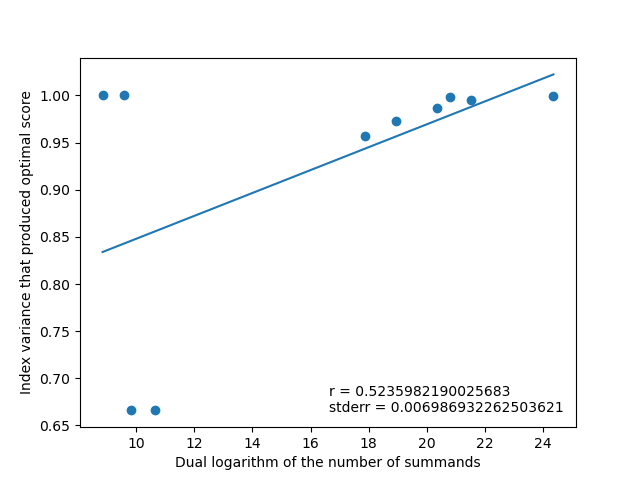

In [19]:
%matplotlib notebook
import csv
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from math import log2
from scipy.stats import linregress
import numpy as np

variances = None
with open('variances.csv') as f:
    r = csv.reader(f)
    variances = [(datafile, int(n), float(variance)) for datafile, n, variance in r]

fig, ax = plt.subplots()
    
x = list(map(lambda k: log2(k[1]), variances)) # n
y = list(map(lambda k: k[2], variances)) # optimal variance
plt.scatter(x, y)
plt.ylabel('Index variance that produced optimal score')
plt.xlabel('Dual logarithm of the number of summands')

gradient, intercept, r_value, p_value, std_err = linregress(x, y)
x1 = np.linspace(min(x), max(x), 50)
y1 = gradient * x1 + intercept
plt.plot(x1, y1)
at = AnchoredText(f"r = {r_value}\nstderr = {std_err}", loc='lower right', frameon=False)
ax.add_artist(at)

plt.show()

There seems to be a positive correletion between the size of the dataset and the optimal index variance, which is expected since larger datasets
are mostly computationally bounded and the communication overhead becomes negligibly.

The two outliers where even with a low number of summands the initial distribution mostly without any optimizations was accepted are the datasets _multi100_ and _354_. Their n equals 767 and 460 respectively, and one could argue that with such a lower amount of calculations per rank any distribution optimization is unnecessary since the baseline algorithm (Gather, Accumulate, Broadcast) provides a much faster alternative.

This gives raise to the following heuristic: with smaller dataset allow a larger variance in the distribution of numbers.